In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
img_array = cv2.imread("train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

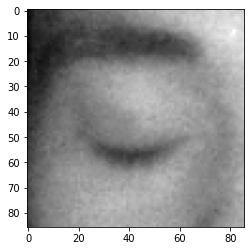

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

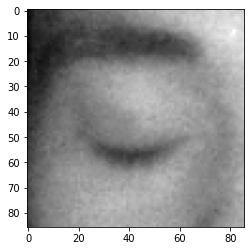

In [5]:
Datadirectory = "train"
Classes = ["Closed_Eyes","Open_Eyes"] 
for category in Classes:
    path =os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break    

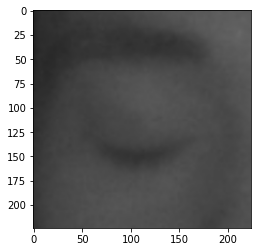

In [6]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

### Reading all data

In [7]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
 create_training_Data()

In [9]:
 print(len(training_Data))

4000


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(4000, 224, 224, 3)

In [13]:
X = X.astype('float32') / 255.0

In [14]:
Y = np.array(y)

## Training the model

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [16]:
model = tf.keras.applications.MobileNetV2()

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Transfer learning

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (0/1)
final_output = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [22]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Binary classification

In [23]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
new_model.fit(X, Y, epochs=10, validation_split=0.)

Epoch 1/10
100/100 [==============================] - 383s 4s/step - loss: 0.2579 - accuracy: 0.9928 - val_loss: 65.8269 - val_accuracy: 0.9388
Epoch 2/10
100/100 [==============================] - 348s 3s/step - loss: 0.0811 - accuracy: 0.9975 - val_loss: 39.1843 - val_accuracy: 0.9600
Epoch 3/10
100/100 [==============================] - 348s 3s/step - loss: 0.1453 - accuracy: 0.9972 - val_loss: 54.6834 - val_accuracy: 0.9212
Epoch 4/10
100/100 [==============================] - 347s 3s/step - loss: 0.1822 - accuracy: 0.9975 - val_loss: 551.5773 - val_accuracy: 0.5888
Epoch 5/10
100/100 [==============================] - 346s 3s/step - loss: 0.7712 - accuracy: 0.9937 - val_loss: 3165.7229 - val_accuracy: 0.5362
Epoch 6/10
100/100 [==============================] - 348s 3s/step - loss: 0.3188 - accuracy: 0.9978 - val_loss: 1586.9056 - val_accuracy: 0.6400
Epoch 7/10
100/100 [==============================] - 347s 3s/step - loss: 0.1143 - accuracy: 0.9978 - val_loss: 1308.5093 - val_ac

# save the model

In [26]:
 new_model.save('my_model.h5')

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
new_model = tf.keras.models.load_model('my_model.h5')

# check on unknown image

In [21]:
img = cv2.imread('willeo.jpg')

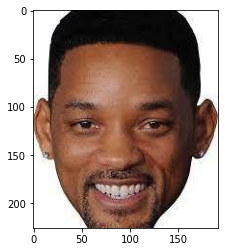

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [24]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [27]:
for(x,y,w,h) in eyes:
         cv2.rectangle(img, (x,y), (x+w , y+h), (0,255,0), 2)

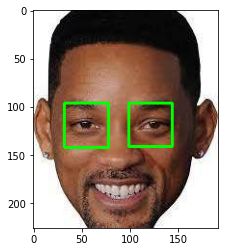

In [28]:
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess =eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey, ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]  

eyes are not detected


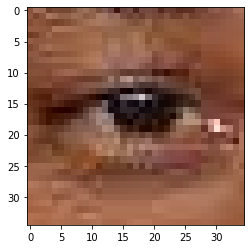

In [30]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [31]:
eyes_roi.shape

(35, 35, 3)

In [32]:
final_image =cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0) ## need fourth dimension
final_image=final_image/255.0

In [33]:
final_image.shape

(1, 224, 224, 3)

In [34]:
new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

# Real time detecion

In [35]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0) ## Add fourth Dimension
    final_image=final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions<0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)

        
    font = cv2.FONT_HERSHEY_SIMPLEX

    # use putText() method for
    # inserting text on video
    cv2.putText(frame,
                status,
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)

    cv2.imshow("Drowsiness Detection Tutorial", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 121ms/step
eyes are not detected
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 144ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 151ms/step
eyes are not detected
1/1 [==============================] - 0s 71ms/step
eyes are not detected
1/1 [==============================] - 0s 84ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 142ms/step
eyes are not detected
1/1 [==============================] - 0s 64ms/step
eyes are not detected
1/1 [==============================] - 0s 91ms/step
eyes are not detected
1/1 [==============================] - 0s 85ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 109ms/step
eyes are not detected
1/1 [==============================] - 0s 61ms/step
eyes are not detected
1/1 [==============================] - 0s 98ms/step
eyes are not detect

1/1 [==============================] - 0s 95ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 111ms/step
eyes are not detected
1/1 [==============================] - 0s 71ms/step
eyes are not detected
1/1 [==============================] - 0s 68ms/step


In [ ]:
q